# Naive Version of Neural Network

### Required Libraries for linear algeras

In [19]:
import numpy as np

In [23]:
np.linspace(0,1,10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

### Activation function

In [56]:
def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1.0 - np.tanh(x)*np.tanh(x)

def logistic(x):
    return 1.0/(1.0 + np.exp(-x))

def logistic_deriv(x):
    return logistic(x)*(1 - logistic(x))

def relu(x):
    return x*(x>0)

# Lack of theoretical support around x = 0 in derivative of ReLU
def relu_deriv(x):
    return 1.0*(x>0)

#### Basic Properties

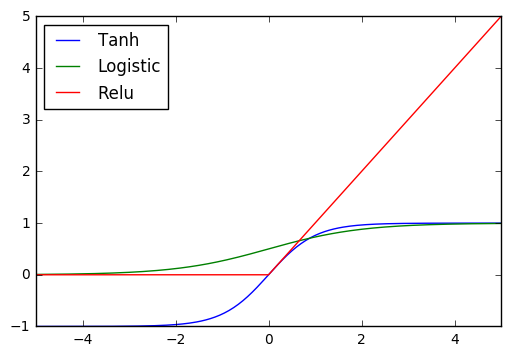

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5,5,201)
plt.plot(x,tanh(x),label='Tanh')
plt.plot(x,logistic(x),label='Logistic')
plt.plot(x,relu(x),label='Relu')
plt.xlim([x.min(),x.max()])
plt.legend(loc=2)
plt.show()

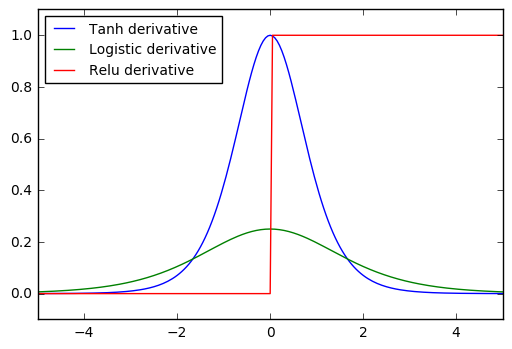

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5,5,201)
plt.plot(x,tanh_deriv(x),label='Tanh derivative')
plt.plot(x,logistic_deriv(x),label='Logistic derivative')
plt.plot(x,relu_deriv(x),label='Relu derivative')
plt.ylim([-0.1,1.1])
plt.xlim([x.min(),x.max()])
plt.legend(loc=2,fontsize=10)
plt.show()

### Neural Network

#### BP Algorithms
Weights: $ \omega(i,j)$ means the weight in $i$-th node of $j$-th layer, $b_j$ means bias weight

Error:
$$ Err(\omega,b) = \frac{1}{2}(y - y_{pred})^2 $$
$$ x_j = f\left(\sum_{i=1}^{M} \omega_{i,j} x_i + b_j\right) $$

$$ \frac{\partial Err(\omega,b)}{\partial \omega_{i,j}} = (y-y_{pred}) \frac{\partial y_{pred}} {\partial \omega_{i,j}}$$

$$ \frac{\partial y_{pred}} {\partial \omega_{i,j}} = f'(S_{j}) \frac{\partial S_{j}} {\partial \omega_{i,j}} = f'(S_{j}) x_i$$
where $ S_{j} = \sum_{i=1}^{M} \omega_{i,j} x_i + b_j$. In same way, we can have:
$$ \frac{\partial y_{pred}} {\partial b_j} = f'(S_{j}) \frac{\partial S_{j}} {\partial b_j} = f'(S_{j}) $$

So, we have:
$$ \frac{\partial Err(\omega,b)}{\partial \omega_{i,j}} = \delta_{i,j} x_i$$
$$ \frac{\partial Err(\omega,b)}{\partial b_j} = \delta_{i,j}$$
where $\delta_{i,j} = (y-y_{pred})f'(S_{j})$. Meanwhile, according to gradient theroem, we can update weight by the following rule:
$$ \Delta\omega_{i,j} = - \eta \frac{\partial Err(\omega,b)}{\partial \omega_{i,j}} $$
where $\eta$ is the learning rate.

In [74]:
class NeuralNetwork:
    def __init__(self,layers,activation='tanh'):
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_deriv
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
            
        self.weights = []
        for i in range(1, len(layers) - 1):
            self.weights.append(\
                (2*np.random.random((layers[i - 1] + 1, layers[i] + 1))-1)*0.25)
            self.weights.append(\
                (2*np.random.random((layers[i] + 1, layers[i + 1]))-1)*0.25)
    def fit(self,X,y,learning_rate=0.2,epochs=10000):
        X = np.atleast_2d(X) #Make sure that arrays with at least two dimensions
        temp = np.ones([X.shape[0],X.shape[1]+1])
        temp[:,0:-1] = X # Add bias terms
        X = temp
        y = np.array(y)
        
        for k in range(epochs):
            # Pick one instance to train network randomly
            # Stochastic gradient
            i = np.random.randint(X.shape[0]) 
            a = [X[i]]
            
            for layer in range(len(self.weights)):
                a.append(self.activation(np.dot(a[layer],self.weights[layer])))
            error = y[i] - a[-1]
            deltas = [error*self.activation_deriv(a[-1])]
                         
            for layer in range(len(a)-2,0,-1):
                deltas.append(\
                    deltas[-1].dot(self.weights[layer].T)*self.activation_deriv(a[layer]))
            deltas.reverse()
            
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate*layer.T.dot(delta)

    def predict(self,x):
        x = np.array(x)
        temp = np.ones(x.shape[0]+1)
        temp[0:-1] = x
        a = temp
        for layer in range(0,len(self.weights)):
            a = self.activation(np.dot(a,self.weights[layer]))
        return a

### Gradient Means
+ Stochastic Gradient
+ Batch Gradient
+ MiniBatch Gradient

### Test Neural Network

In [75]:
nn = NeuralNetwork([2,2,1],'tanh')
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([1,0,0,1])
nn.fit(x,y,0.1,10000)
for i in [[0,0],[0,1],[1,0],[1,1]]:
    print (i,nn.predict(i))

([0, 0], array([ 0.99679027]))
([0, 1], array([ 0.00123783]))
([1, 0], array([ 0.00458419]))
([1, 1], array([ 0.99682851]))
